In [1]:
# basic libraries
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from datetime import datetime

# OS
import os

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

# scikit-learn
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn import svm
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# deep learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorboard.plugins import projector

In [2]:
# dataset
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [3]:
# setting up the variables
cancer_data = pd.DataFrame(cancer['data'], columns = cancer['feature_names'])
cancer_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# dataset information
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [5]:
# dataset description
cancer_data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


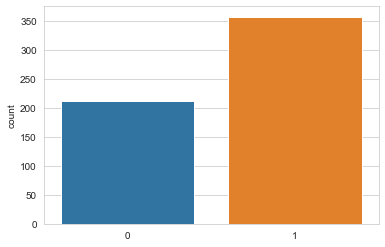

In [6]:
# class countplot
sns.countplot(cancer['target'])

In [7]:
# merging dataset
cancer_dataset = cancer_data.copy()
cancer_dataset['benign'] = cancer['target']
cancer_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [8]:
# features correlation with class
cancer_dataset.corr()['benign']

mean radius               -0.730029
mean texture              -0.415185
mean perimeter            -0.742636
mean area                 -0.708984
mean smoothness           -0.358560
mean compactness          -0.596534
mean concavity            -0.696360
mean concave points       -0.776614
mean symmetry             -0.330499
mean fractal dimension     0.012838
radius error              -0.567134
texture error              0.008303
perimeter error           -0.556141
area error                -0.548236
smoothness error           0.067016
compactness error         -0.292999
concavity error           -0.253730
concave points error      -0.408042
symmetry error             0.006522
fractal dimension error   -0.077972
worst radius              -0.776454
worst texture             -0.456903
worst perimeter           -0.782914
worst area                -0.733825
worst smoothness          -0.421465
worst compactness         -0.590998
worst concavity           -0.659610
worst concave points      -0

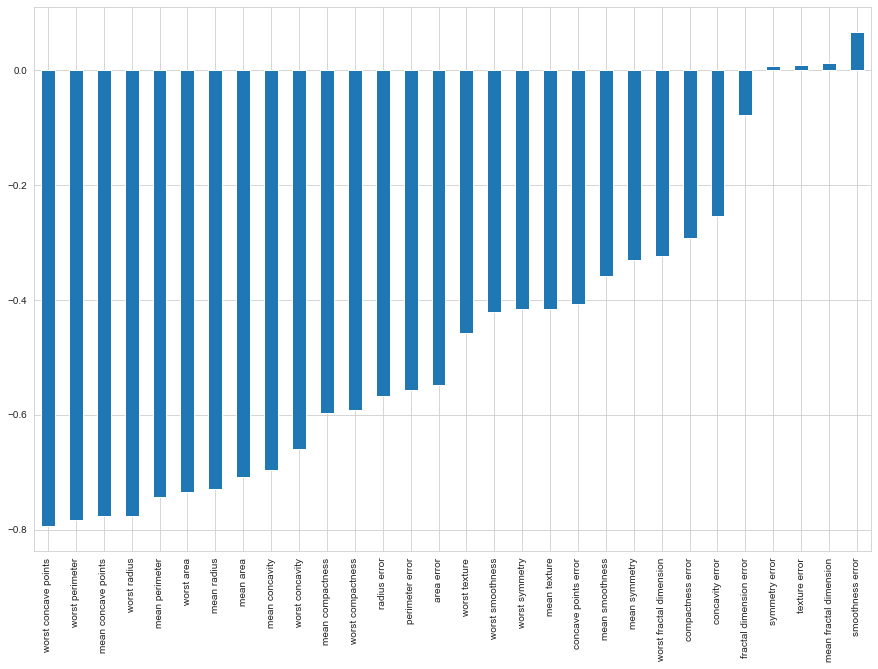

In [9]:
# barplot
plt.figure(figsize = (15, 10))
cancer_dataset.corr()['benign'][:-1].sort_values().plot(kind = 'bar')

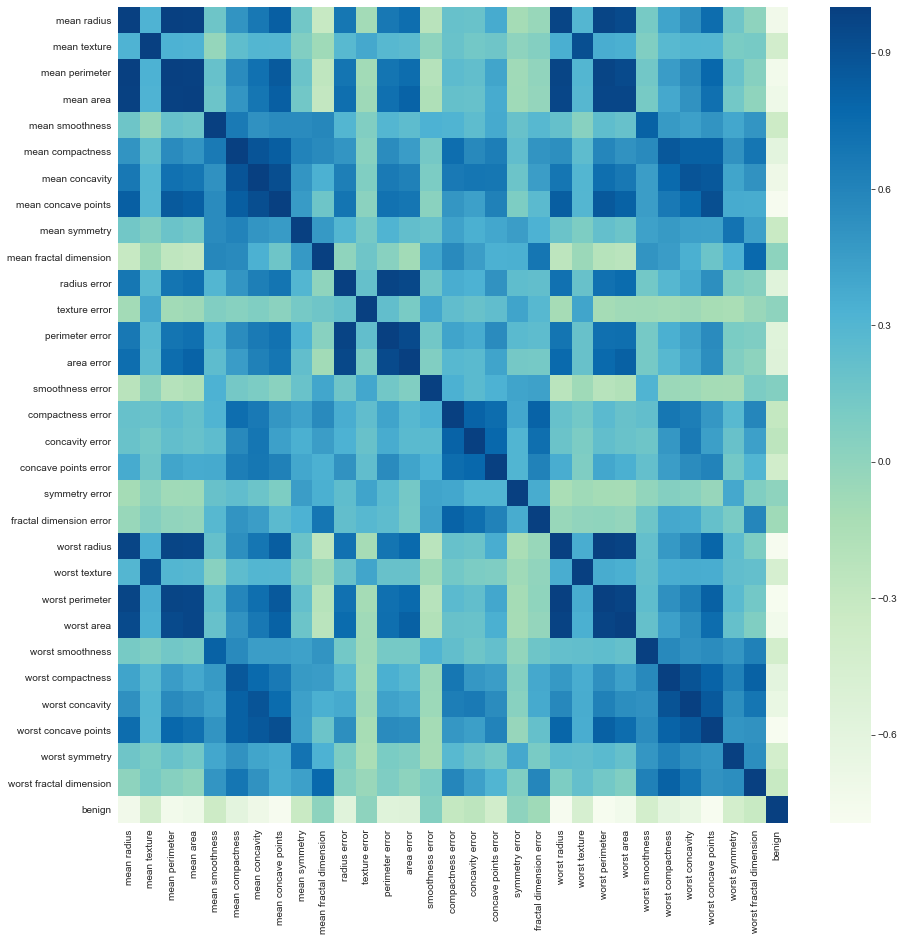

In [10]:
# heatmap
plt.figure(figsize = (15, 15))
sns.heatmap(cancer_dataset.corr(), cmap = 'GnBu')

In [11]:
# setting up x and y
x = cancer_data
y = cancer['target']

# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 101)

In [12]:
# fitting the model with SVC
svc = SVC()
svc.fit(x_train, y_train)

D:\Applications\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [13]:
# predicting
prediction = svc.predict(x_test)

In [14]:
# classification report
print(metrics.classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        55
           1       0.62      1.00      0.76        88

    accuracy                           0.62       143
   macro avg       0.31      0.50      0.38       143
weighted avg       0.38      0.62      0.47       143



D:\Applications\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [15]:
# confusion matrix
conmat = np.array(metrics.confusion_matrix(y_test, prediction))

conlist = []
for i in np.squeeze(conmat):
    conlist.append(i)

matrix = pd.DataFrame(conlist, columns = [['Predicted', 'Predicted'], ['Malignant', 'Benign']]).transpose()
matrix.columns = [['Actual', 'Actual'], ['Malignant', 'Benign']]
matrix.transpose()

Predicted       
                 Malignant Benign
Actual Malignant         0     55
       Benign            0     88

As the SVC only predicts values of only one target, grid search is used to adjust SVC parameters.

In [16]:
# setting up parameters for grid search
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001]
}

In [17]:
# fitting the model with GridSearchCV with SVC as an estimator
grid = GridSearchCV(estimator = SVC(), param_grid = param_grid, verbose = 3)
grid.fit(x_train, y_train)

D:\Applications\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.629, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.634, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.631, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.629, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.634, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.631, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...........

[CV] ..................... C=1000, gamma=1, score=0.631, total=   0.0s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ................... C=1000, gamma=0.1, score=0.629, total=   0.0s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ................... C=1000, gamma=0.1, score=0.634, total=   0.0s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ................... C=1000, gamma=0.1, score=0.631, total=   0.0s
[CV] C=1000, gamma=0.01 ..............................................
[CV] .................. C=1000, gamma=0.01, score=0.629, total=   0.0s
[CV] C=1000, gamma=0.01 ..............................................
[CV] .................. C=1000, gamma=0.01, score=0.634, total=   0.0s
[CV] C=1000, gamma=0.01 ..............................................
[CV] .................. C=1000, gamma=0.01, score=0.631, total=   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.8s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [18]:
# the cross validation score
grid.best_params_

{'C': 10, 'gamma': 0.0001}

In [19]:
# the best estimator
grid.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [20]:
# predicting the model
grid_prediction = grid.predict(x_test)

In [21]:
# classification report
print(metrics.classification_report(y_test, grid_prediction))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        55
           1       0.96      0.99      0.97        88

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



In [22]:
# confusion matrix
conmat = np.array(metrics.confusion_matrix(y_test, grid_prediction))

conlist = []
for i in np.squeeze(conmat):
    conlist.append(i)

matrix = pd.DataFrame(conlist, columns = [['Predicted', 'Predicted'], ['Malignant', 'Benign']]).transpose()
matrix.columns = [['Actual', 'Actual'], ['Malignant', 'Benign']]
matrix.transpose()

Predicted       
                 Malignant Benign
Actual Malignant        51      4
       Benign            1     87

In [23]:
# gitting the model with StandardScaler 
scaler = StandardScaler()
scaler.fit(x)

# transform the data
scaled_data = scaler.transform(x)

In [24]:
# fitting the model with Principal Component Analysis
pca = PCA(n_components = 2)
pca.fit(scaled_data)

# transform the data
x_pca = pca.transform(scaled_data)

In [25]:
# shape comparison before/after PCA
print("Before PCA transformation: {}\nAfter PCA transformation: {}".format(scaled_data.shape, x_pca.shape))

Before PCA transformation: (569, 30)
After PCA transformation: (569, 2)


Text(0, 0.5, 'Second Principal Component')

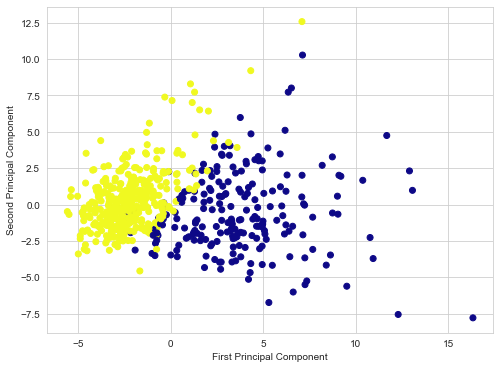

In [26]:
# plot data after PCA tranformation
plt.figure(figsize = (8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c = y, cmap = 'plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     0.218902      0.103725        0.227537   0.220995         0.142590   
1    -0.233857     -0.059706       -0.215181  -0.231077         0.186113   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          0.239285        0.258400             0.260854       0.138167   
1          0.151892        0.060165            -0.034768       0.190349   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                0.064363  ...      0.227997       0.104469         0.236640   
1                0.366575  ...     -0.219866      -0.045467        -0.199878   

   worst area  worst smoothness  worst compactness  worst concavity  \
0    0.224871          0.127953           0.210096         0.228768   
1   -0.219352          0.172304           0.143593         0.097964   

   worst concave points  worst symmetry  worst fractal dimension  
0              0.250886

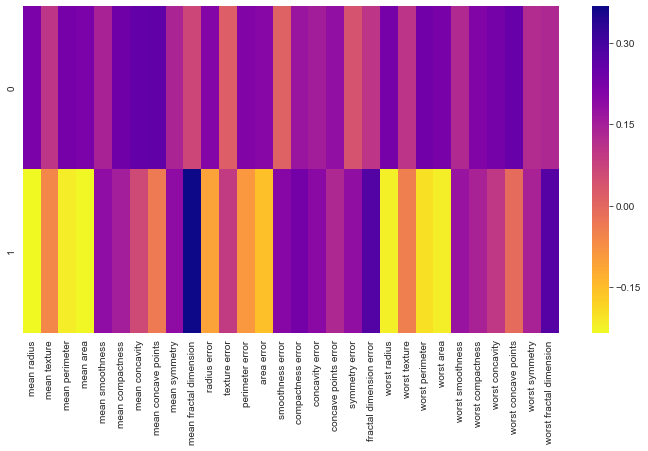

In [27]:
# correlation between the various features and principal components  
pca_comp = pd.DataFrame(pca.components_, columns = cancer['feature_names'])
print(pca_comp)

# heatmap
plt.figure(figsize = (12, 6))
sns.heatmap(pca_comp, cmap = 'plasma_r')

In [28]:
# scaling with MinMaxScaler
minmaxscaler = MinMaxScaler()

x_train = minmaxscaler.fit_transform(x_train)
x_test = minmaxscaler.transform(x_test)

x_train.shape

(426, 30)

In [29]:
# deep learning model
model = Sequential()

# hidden layers
model.add(Dense(units = 30, activation = 'relu'))
model.add(Dense(units = 15, activation = 'relu'))

# binary classification output
model.add(Dense(units = 1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

# fitting the model
model.fit(
    x = x_train, 
    y = y_train,
    epochs = 600, 
    validation_data = (x_test, y_test)
)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 0s 944us/sample - loss: 0.6794 - val_loss: 0.6647
Epoch 2/600
426/426 [==============================] - 0s 60us/sample - loss: 0.6506 - val_loss: 0.6392
Epoch 3/600
426/426 [==============================] - 0s 54us/sample - loss: 0.6204 - val_loss: 0.6109
Epoch 4/600
426/426 [==============================] - 0s 96us/sample - loss: 0.5880 - val_loss: 0.5758
Epoch 5/600
426/426 [==============================] - 0s 56us/sample - loss: 0.5525 - val_loss: 0.5381
Epoch 6/600
426/426 [==============================] - 0s 58us/sample - loss: 0.5140 - val_loss: 0.4962
Epoch 7/600
426/426 [==============================] - 0s 72us/sample - loss: 0.4729 - val_loss: 0.4532
Epoch 8/600
4

426/426 [==============================] - 0s 52us/sample - loss: 0.0544 - val_loss: 0.1043
Epoch 73/600
426/426 [==============================] - 0s 60us/sample - loss: 0.0539 - val_loss: 0.1043
Epoch 74/600
426/426 [==============================] - 0s 49us/sample - loss: 0.0535 - val_loss: 0.1084
Epoch 75/600
426/426 [==============================] - 0s 49us/sample - loss: 0.0555 - val_loss: 0.1041
Epoch 76/600
426/426 [==============================] - 0s 77us/sample - loss: 0.0549 - val_loss: 0.1065
Epoch 77/600
426/426 [==============================] - 0s 56us/sample - loss: 0.0546 - val_loss: 0.1022
Epoch 78/600
426/426 [==============================] - 0s 49us/sample - loss: 0.0571 - val_loss: 0.1054
Epoch 79/600
426/426 [==============================] - 0s 70us/sample - loss: 0.0621 - val_loss: 0.1073
Epoch 80/600
426/426 [==============================] - 0s 56us/sample - loss: 0.0580 - val_loss: 0.0999
Epoch 81/600
426/426 [==============================] - 0s 63us/samp

426/426 [==============================] - 0s 56us/sample - loss: 0.0404 - val_loss: 0.1042
Epoch 150/600
426/426 [==============================] - 0s 63us/sample - loss: 0.0452 - val_loss: 0.1007
Epoch 151/600
426/426 [==============================] - 0s 61us/sample - loss: 0.0391 - val_loss: 0.1039
Epoch 152/600
426/426 [==============================] - 0s 56us/sample - loss: 0.0378 - val_loss: 0.1020
Epoch 153/600
426/426 [==============================] - 0s 61us/sample - loss: 0.0387 - val_loss: 0.1026
Epoch 154/600
426/426 [==============================] - 0s 61us/sample - loss: 0.0404 - val_loss: 0.1038
Epoch 155/600
426/426 [==============================] - 0s 66us/sample - loss: 0.0382 - val_loss: 0.1040
Epoch 156/600
426/426 [==============================] - 0s 59us/sample - loss: 0.0392 - val_loss: 0.1011
Epoch 157/600
426/426 [==============================] - 0s 56us/sample - loss: 0.0393 - val_loss: 0.1014
Epoch 158/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 45us/sample - loss: 0.0307 - val_loss: 0.1084
Epoch 227/600
426/426 [==============================] - 0s 44us/sample - loss: 0.0299 - val_loss: 0.1038
Epoch 228/600
426/426 [==============================] - 0s 49us/sample - loss: 0.0295 - val_loss: 0.1135
Epoch 229/600
426/426 [==============================] - 0s 49us/sample - loss: 0.0297 - val_loss: 0.1044
Epoch 230/600
426/426 [==============================] - 0s 44us/sample - loss: 0.0303 - val_loss: 0.1176
Epoch 231/600
426/426 [==============================] - 0s 50us/sample - loss: 0.0293 - val_loss: 0.1032
Epoch 232/600
426/426 [==============================] - 0s 49us/sample - loss: 0.0304 - val_loss: 0.1139
Epoch 233/600
426/426 [==============================] - 0s 45us/sample - loss: 0.0274 - val_loss: 0.1050
Epoch 234/600
426/426 [==============================] - 0s 52us/sample - loss: 0.0279 - val_loss: 0.1095
Epoch 235/600
426/426 [==============================] - 0s 

Epoch 303/600
426/426 [==============================] - 0s 44us/sample - loss: 0.0201 - val_loss: 0.1217
Epoch 304/600
426/426 [==============================] - 0s 63us/sample - loss: 0.0204 - val_loss: 0.1131
Epoch 305/600
426/426 [==============================] - 0s 59us/sample - loss: 0.0233 - val_loss: 0.1147
Epoch 306/600
426/426 [==============================] - 0s 42us/sample - loss: 0.0210 - val_loss: 0.1164
Epoch 307/600
426/426 [==============================] - 0s 43us/sample - loss: 0.0193 - val_loss: 0.1159
Epoch 308/600
426/426 [==============================] - 0s 47us/sample - loss: 0.0197 - val_loss: 0.1188
Epoch 309/600
426/426 [==============================] - 0s 47us/sample - loss: 0.0193 - val_loss: 0.1164
Epoch 310/600
426/426 [==============================] - 0s 44us/sample - loss: 0.0214 - val_loss: 0.1203
Epoch 311/600
426/426 [==============================] - 0s 49us/sample - loss: 0.0228 - val_loss: 0.1119
Epoch 312/600
426/426 [=======================

426/426 [==============================] - 0s 59us/sample - loss: 0.0154 - val_loss: 0.1423
Epoch 381/600
426/426 [==============================] - 0s 84us/sample - loss: 0.0158 - val_loss: 0.1259
Epoch 382/600
426/426 [==============================] - 0s 58us/sample - loss: 0.0165 - val_loss: 0.1324
Epoch 383/600
426/426 [==============================] - 0s 52us/sample - loss: 0.0156 - val_loss: 0.1273
Epoch 384/600
426/426 [==============================] - 0s 54us/sample - loss: 0.0165 - val_loss: 0.1391
Epoch 385/600
426/426 [==============================] - 0s 47us/sample - loss: 0.0145 - val_loss: 0.1286
Epoch 386/600
426/426 [==============================] - 0s 47us/sample - loss: 0.0135 - val_loss: 0.1346
Epoch 387/600
426/426 [==============================] - 0s 44us/sample - loss: 0.0138 - val_loss: 0.1280
Epoch 388/600
426/426 [==============================] - 0s 51us/sample - loss: 0.0134 - val_loss: 0.1306
Epoch 389/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 59us/sample - loss: 0.0088 - val_loss: 0.1469
Epoch 458/600
426/426 [==============================] - 0s 61us/sample - loss: 0.0086 - val_loss: 0.1585
Epoch 459/600
426/426 [==============================] - 0s 52us/sample - loss: 0.0089 - val_loss: 0.1510
Epoch 460/600
426/426 [==============================] - 0s 54us/sample - loss: 0.0103 - val_loss: 0.1448
Epoch 461/600
426/426 [==============================] - 0s 52us/sample - loss: 0.0101 - val_loss: 0.1625
Epoch 462/600
426/426 [==============================] - 0s 56us/sample - loss: 0.0082 - val_loss: 0.1472
Epoch 463/600
426/426 [==============================] - 0s 54us/sample - loss: 0.0086 - val_loss: 0.1559
Epoch 464/600
426/426 [==============================] - 0s 66us/sample - loss: 0.0085 - val_loss: 0.1454
Epoch 465/600
426/426 [==============================] - 0s 52us/sample - loss: 0.0116 - val_loss: 0.1604
Epoch 466/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 47us/sample - loss: 0.0050 - val_loss: 0.1599
Epoch 535/600
426/426 [==============================] - 0s 49us/sample - loss: 0.0061 - val_loss: 0.1684
Epoch 536/600
426/426 [==============================] - 0s 101us/sample - loss: 0.0049 - val_loss: 0.1612
Epoch 537/600
426/426 [==============================] - 0s 49us/sample - loss: 0.0047 - val_loss: 0.1677
Epoch 538/600
426/426 [==============================] - 0s 49us/sample - loss: 0.0056 - val_loss: 0.1642
Epoch 539/600
426/426 [==============================] - 0s 47us/sample - loss: 0.0061 - val_loss: 0.1741
Epoch 540/600
426/426 [==============================] - 0s 89us/sample - loss: 0.0083 - val_loss: 0.1580
Epoch 541/600
426/426 [==============================] - 0s 47us/sample - loss: 0.0049 - val_loss: 0.1779
Epoch 542/600
426/426 [==============================] - 0s 47us/sample - loss: 0.0053 - val_loss: 0.1619
Epoch 543/600
426/426 [==============================] - 0s

<Figure size 720x576 with 0 Axes>

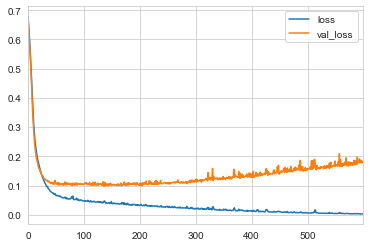

In [30]:
# model history
loss_df = pd.DataFrame(model.history.history)

# loss plot
plt.figure(figsize = (10, 8))
loss_df.plot()

The model suffers from overfitting.

In [31]:
# deep learning model
model = Sequential()

# hidden layers
model.add(Dense(units = 30, activation = 'relu'))
model.add(Dense(units = 15, activation = 'relu'))

# binary classification output
model.add(Dense(units = 1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [32]:
# using EarlyStopping
earlystop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 25)

# fitting the model
model.fit(
    x = x_train, 
    y = y_train,
    epochs = 600, 
    validation_data = (x_test, y_test), 
    callbacks = [earlystop]
)

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 0s 906us/sample - loss: 0.6900 - val_loss: 0.6760
Epoch 2/600
426/426 [==============================] - 0s 52us/sample - loss: 0.6678 - val_loss: 0.6515
Epoch 3/600
426/426 [==============================] - 0s 59us/sample - loss: 0.6383 - val_loss: 0.6200
Epoch 4/600
426/426 [==============================] - 0s 56us/sample - loss: 0.6020 - val_loss: 0.5780
Epoch 5/600
426/426 [==============================] - 0s 51us/sample - loss: 0.5539 - val_loss: 0.5242
Epoch 6/600
426/426 [==============================] - 0s 61us/sample - loss: 0.5004 - val_loss: 0.4654
Epoch 7/600
426/426 [==============================] - 0s 51us/sample - loss: 0.4444 - val_loss: 0.4128
Epoch 8/600
426/426 [==============================] - 0s 56us/sample - loss: 0.3942 - val_loss: 0.3595
Epoch 9/600
426/426 [==============================] - 0s 70us/sample - loss: 0.3429 - val_loss: 0.3128
Epoch 10/600
426/

One way to get rid of the overfitting is to apply early stopping.

<Figure size 720x576 with 0 Axes>

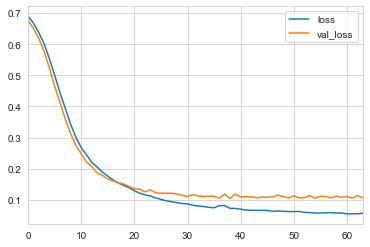

In [33]:
# model history
loss_df = pd.DataFrame(model.history.history)

# loss plot
plt.figure(figsize = (10, 8))
loss_df.plot()

In [34]:
# deep learning model
model = Sequential()

# hidden layers
model.add(Dense(units = 30, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 15, activation = 'relu'))
model.add(Dropout(0.5))

# binary classification output
model.add(Dense(units = 1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

Another way is to apply dropouts to each hidden layer.

In [35]:
# using EarlyStopping
earlystop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 25)

# fitting the model
model.fit(
    x = x_train, 
    y = y_train,
    epochs = 600, 
    validation_data = (x_test, y_test), 
    callbacks = [earlystop]
)

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 0s 1ms/sample - loss: 0.6936 - val_loss: 0.6571
Epoch 2/600
426/426 [==============================] - 0s 73us/sample - loss: 0.6593 - val_loss: 0.6341
Epoch 3/600
426/426 [==============================] - 0s 59us/sample - loss: 0.6326 - val_loss: 0.6103
Epoch 4/600
426/426 [==============================] - 0s 63us/sample - loss: 0.6009 - val_loss: 0.5811
Epoch 5/600
426/426 [==============================] - 0s 59us/sample - loss: 0.6137 - val_loss: 0.5551
Epoch 6/600
426/426 [==============================] - 0s 59us/sample - loss: 0.5854 - val_loss: 0.5339
Epoch 7/600
426/426 [==============================] - 0s 61us/sample - loss: 0.5478 - val_loss: 0.5068
Epoch 8/600
426/426 [==============================] - 0s 54us/sample - loss: 0.5472 - val_loss: 0.4822
Epoch 9/600
426/426 [==============================] - 0s 52us/sample - loss: 0.5317 - val_loss: 0.4620
Epoch 10/600
426/42

426/426 [==============================] - 0s 56us/sample - loss: 0.1200 - val_loss: 0.1078
Epoch 79/600
426/426 [==============================] - 0s 54us/sample - loss: 0.1142 - val_loss: 0.1045
Epoch 80/600
426/426 [==============================] - 0s 52us/sample - loss: 0.1168 - val_loss: 0.1023
Epoch 81/600
426/426 [==============================] - 0s 49us/sample - loss: 0.1028 - val_loss: 0.1013
Epoch 82/600
426/426 [==============================] - 0s 54us/sample - loss: 0.1016 - val_loss: 0.1044
Epoch 83/600
426/426 [==============================] - 0s 52us/sample - loss: 0.1103 - val_loss: 0.1034
Epoch 84/600
426/426 [==============================] - 0s 51us/sample - loss: 0.1375 - val_loss: 0.1062
Epoch 85/600
426/426 [==============================] - 0s 54us/sample - loss: 0.1390 - val_loss: 0.0999
Epoch 86/600
426/426 [==============================] - 0s 49us/sample - loss: 0.1132 - val_loss: 0.1004
Epoch 87/600
426/426 [==============================] - 0s 54us/samp

<Figure size 720x576 with 0 Axes>

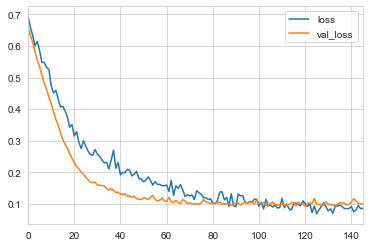

In [36]:
# model history
loss_df = pd.DataFrame(model.history.history)

# loss plot
plt.figure(figsize = (10, 8))
loss_df.plot()

In combination of both dropouts and early stopping callbacks, the model's loss has decreased tremendously.

In [37]:
# predicting the model
prediction = model.predict_classes(x_test)

In [38]:
# classification report
print(metrics.classification_report(y_test, prediction, target_names = ['Malignant', 'Benign']))

              precision    recall  f1-score   support

   Malignant       0.95      0.98      0.96        55
      Benign       0.99      0.97      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [39]:
# confusion matrix
conmat = np.array(metrics.confusion_matrix(y_test, prediction))

conlist = []
for i in np.squeeze(conmat):
    conlist.append(i)

matrix = pd.DataFrame(conlist, columns = [['Predicted', 'Predicted'], ['Malignant', 'Benign']]).transpose()
matrix.columns = [['Actual', 'Actual'], ['Malignant', 'Benign']]
matrix.transpose()

Predicted       
                 Malignant Benign
Actual Malignant        54      1
       Benign            3     85

In [40]:
# log directory
log_directory = 'logs\\fit'
log_directory = log_directory + '\\' + datetime.now().strftime('%Y-%m-%d--%H%M')

# TensorBoard
board = TensorBoard(
    log_dir = log_directory, 
    histogram_freq = 1,
    write_graph = True,
    write_images = True,
    update_freq = 'epoch',
    profile_batch = 2
)

In [41]:
# deep learning model
model = Sequential()

# hidden layers
model.add(Dense(units = 30, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 15, activation = 'relu'))
model.add(Dropout(0.5))

# binary classification output
model.add(Dense(units = 1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [42]:
# fitting the model
model.fit(
    x = x_train, 
    y = y_train,
    epochs = 600, 
    validation_data = (x_test, y_test), 
    verbose = 1,
    callbacks = [earlystop, board]
)

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 2ms/sample - loss: 0.7100 - acc: 0.5423 - val_loss: 0.6782 - val_acc: 0.6154
Epoch 2/600
426/426 [==============================] - 0s 204us/sample - loss: 0.6850 - acc: 0.5704 - val_loss: 0.6660 - val_acc: 0.6573
Epoch 3/600
426/426 [==============================] - 0s 265us/sample - loss: 0.6682 - acc: 0.6291 - val_loss: 0.6502 - val_acc: 0.7902
Epoch 4/600
426/426 [==============================] - 0s 207us/sample - loss: 0.6590 - acc: 0.6385 - val_loss: 0.6311 - val_acc: 0.8112
Epoch 5/600
426/426 [==============================] - 0s 207us/sample - loss: 0.6406 - acc: 0.6925 - val_loss: 0.6095 - val_acc: 0.8531
Epoch 6/600
426/426 [==============================] - 0s 183us/sample - loss: 0.6217 - acc: 0.7347 - val_loss: 0.5877 - val_acc: 0.8671
Epoch 7/600
426/426 [==============================] - 0s 211us/sample - loss: 0.5895 - acc: 0.7488 - val_loss: 0.5635 - val_acc: 0.87

Epoch 60/600
426/426 [==============================] - 0s 208us/sample - loss: 0.1503 - acc: 0.9437 - val_loss: 0.0948 - val_acc: 0.9860
Epoch 61/600
426/426 [==============================] - 0s 208us/sample - loss: 0.1359 - acc: 0.9507 - val_loss: 0.0977 - val_acc: 0.9720
Epoch 62/600
426/426 [==============================] - 0s 182us/sample - loss: 0.1660 - acc: 0.9460 - val_loss: 0.1017 - val_acc: 0.9650
Epoch 63/600
426/426 [==============================] - 0s 183us/sample - loss: 0.1245 - acc: 0.9554 - val_loss: 0.0999 - val_acc: 0.9720
Epoch 64/600
426/426 [==============================] - 0s 158us/sample - loss: 0.1440 - acc: 0.9554 - val_loss: 0.0919 - val_acc: 0.9860
Epoch 65/600
426/426 [==============================] - 0s 183us/sample - loss: 0.1616 - acc: 0.9413 - val_loss: 0.0934 - val_acc: 0.9790
Epoch 66/600
426/426 [==============================] - 0s 183us/sample - loss: 0.1578 - acc: 0.9484 - val_loss: 0.0941 - val_acc: 0.9790
Epoch 67/600
426/426 [============

Viewing the Tensor Visualization:
1. In the terminal, cd to the directory where this file is saved (type "pwd" in the cell)
2. Type "tensorboard --logdir logs\\fit" in the terminal
3. Go to http://localhost:6006/ after activating the tensorboard